In [1]:
# Gdata, G2, G3

In [2]:
import igraph
import pandas as pd
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from collections import Counter 
from collections import defaultdict
graph_data = pd.read_csv("manufacturing_emails_temporal_network.csv", sep = ",")

In [3]:
G_data = pd.read_csv("manufacturing_emails_temporal_network.csv", sep = ",")
G_2 = pd.read_csv("manufacturing_emails_temporal_network.csv", sep = ",")
G_3x = pd.read_csv("manufacturing_emails_temporal_network.csv", sep = ",")
G_3 = pd.read_csv("manufacturing_emails_temporal_network.csv", sep = ",")

In [4]:
G_data.head() #G_data can be used here

,node1,node2,timestamp
0,1,2,1
1,1,3,1
2,1,4,1
3,1,5,1
4,1,6,1


In [5]:
from random import shuffle

In [6]:
timestamp_g2 = G_data.timestamp
timestamp_g2 = list(timestamp_g2)
shuffle(timestamp_g2)
print(timestamp_g2[0:5])

[18417, 19478, 51195, 1020, 4921]


In [7]:
for i in range(len(G_2)):
    G_2.timestamp[i]=timestamp_g2[i]

In [8]:
G_2.timestamp[0:5]

0    18417
1    19478
2    51195
3     1020
4     4921
Name: timestamp, dtype: int64

In [9]:
G_2.head() #G_2 can be used here

,node1,node2,timestamp
0,1,2,18417
1,1,3,19478
2,1,4,51195
3,1,5,1020
4,1,6,4921


In [10]:
#timestamp_g3=list(G_3x.timestamp)

In [11]:
#from random import seed
#from random import randint
#seed(1)

In [12]:
#len(G_3)

In [13]:
#for i in range(len(G_3)):
#    G_3.timestamp[i]=0

In [14]:
#G_3.head()

In [15]:
#sum=0
#for i in range(len(timestamp_g3)):
#    value = randint(0, len(G_3x)-1)
#    #print("value：",value)
#    if(G_3.timestamp[value]==0):
#        G_3.timestamp[value]=\
#        timestamp_g3[i]
#    else:
#        G_3x.timestamp[value]=\
#        timestamp_g3[i]
#        sum+=1
#        G_3=G_3.append(G_3x[value:value+1],\
#                   ignore_index=True)

In [16]:
#len(G_3)

In [17]:
#sum=0
#for i in range(len(G_3)):
#    if(G_3.timestamp[i]==0): 
#        sum+=1
#        G_3=G_3.drop([i], axis=0)
#sum

In [18]:
#G_3.to_csv(r'D:\Anaconda3\envs\MDC\G_3.csv')

In [19]:
# G_3.to_csv(r'D:\Anaconda3\envs\MDC\G_3.csv') #this cost a lot of time so I write into csv
# so you can just run 
G_3 = pd.read_csv("G_3.csv", sep = ",")

In [20]:
G_3 = G_3.drop("Unnamed: 0", axis=1)

In [21]:
## Answer to 14

In [22]:
def computing_hist(G):
    graph_nodes = G.drop(["timestamp"], axis=1)
    G_nodes = [tuple(sorted(x)) for x in graph_nodes.values]
    
    keymax=max(G.timestamp)
    key = range(1,keymax+1)
    Temp = []
    for i in range(len(G_nodes)):
        a = []
        a.append(G_nodes[i])
        a.append(G.timestamp[i])
        a=tuple(a)
        Temp.append(a)  
    
    d = defaultdict(list)
    for k, v in Temp:
        d[k].append(v)
        d[k].sort()

    diff_list =[]
    for k,value in d.items(): 
        if(len(value)>1):
            for x, y in zip(value[0::],value[1::]): 
                diff_list.append(y-x) 
    diff_list.sort()

    hist=dict(Counter(diff_list))

    total=0
    for key,value in hist.items():
        total+=value
    
    return hist, total

In [23]:
a, total =computing_hist(G_data)
x1, y1 = zip(*a.items()) # unpack a list of pairs into two tuples
y1=tuple([1/total*i for i in y1])

In [24]:
a, total =computing_hist(G_2)
x2, y2 = zip(*a.items()) # unpack a list of pairs into two tuples
y2=tuple([1/total*i for i in y2])

In [25]:
a, total =computing_hist(G_3)
x3, y3 = zip(*a.items()) # unpack a list of pairs into two tuples
y3=tuple([1/total*i for i in y3])

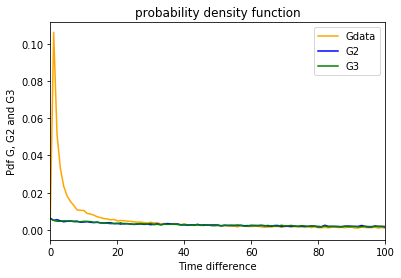

In [26]:
plt.plot(x1, y1, 'orange', label='Gdata')
plt.plot(x2, y2, 'blue', label='G2')
plt.plot(x3, y3, 'green', label='G3')

plt.ylabel('Pdf G, G2 and G3')
plt.xlabel('Time difference')
plt.title('probability density function')
plt.legend()
plt.xlim(0,100)
plt.show()

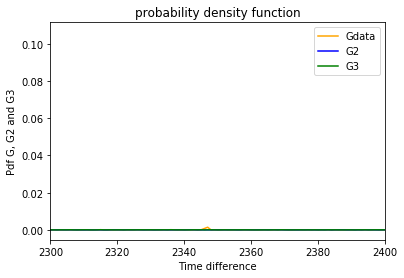

In [27]:
plt.plot(x1, y1, 'orange', label='Gdata')
plt.plot(x2, y2, 'blue', label='G2')
plt.plot(x3, y3, 'green', label='G3')

plt.ylabel('Pdf G, G2 and G3')
plt.xlabel('Time difference')
plt.title('probability density function')
plt.legend()
plt.xlim(2300,2400)
plt.show()

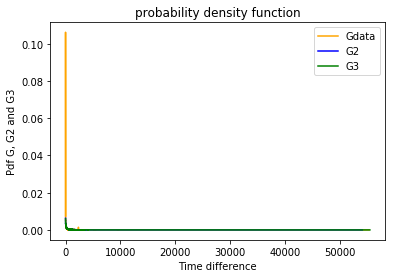

In [28]:
plt.plot(x1, y1, 'orange', label='Gdata')
plt.plot(x2, y2, 'blue', label='G2')
plt.plot(x3, y3, 'green', label='G3')

plt.ylabel('Pdf G, G2 and G3')
plt.xlabel('Time difference')
plt.title('probability density function')
plt.legend()
plt.show()